# Airbnb Data Analysis

# - Data Understanding
##### The following report is going to discuss the following questions:

1- Which property type is the most popular in Boston and Seattle?

2- Do properties sell higher in Boston or Seattle?

3- Which city has the highest property review ratings?

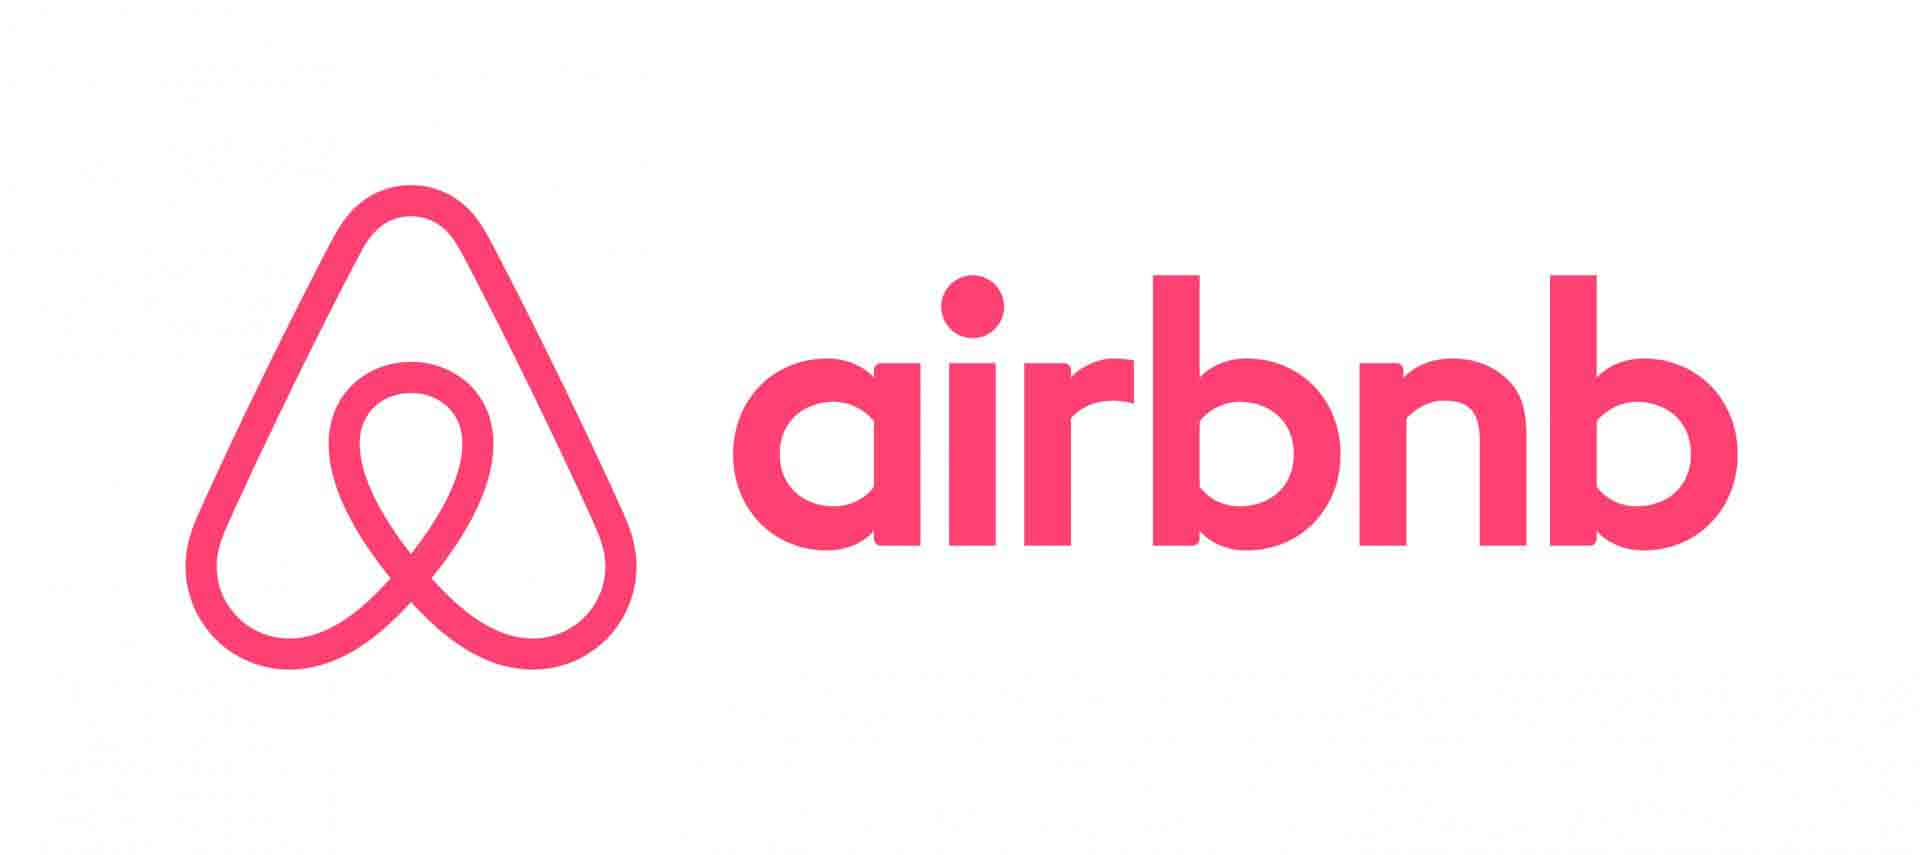

In [137]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

In [138]:
# First we read the data

df = pd.read_csv("boston.csv")
df2 = pd.read_csv("seattle.csv")

# - Cleaning & Preparing Data and answering the questions


# Question 1:  Which property type is the most popular in Boston and Seattle?

In [139]:
# Now to answer the first question we need all the rows with the city boston

boston_only = df[(df["city"] == "Boston")]

In [140]:
# We then group them by property type

boston_popular = boston_only.groupby("property_type").count()["id"]
boston_results = pd.DataFrame(boston_popular)
boston_results

,id
property_type,
Apartment,2501
Bed & Breakfast,36
Boat,12
Condominium,224
Dorm,2
Entire Floor,3
Guesthouse,1
House,494
Loft,35


Text(0.5,1,'Property types in Boston')

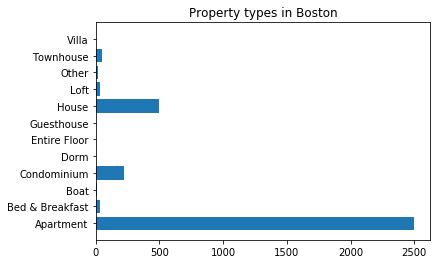

In [141]:
# We plot a bar graph to visualize the result

plt.barh(boston_results.index.tolist(), boston_results["id"])
plt.title("Property types in Boston")

#### As we can clearly see, apartments are the most common in Boston

# Question 2: Do properties sell higher in Boston or Seattle?

In [142]:
# We create a dataframe which has Seattle in the column "city"
seattle_only = df2[(df2["city"] == "Seattle")]


# We define a function to clean the data

def clean_data(col):
    col2 = col.str.replace("$", "")
    col2 = col2.str.replace(",", "")
    col2 = col2.astype("float64")
    return col2

# Then we apply this function on both dataframes
boston_only["price"] = clean_data(boston_only["price"])
seattle_only["price"] = clean_data(seattle_only["price"])

In [143]:
# Now we can easly group by the city (Seattle) and get the mean prices

seattle_mean_prices = seattle_only.groupby("city").mean()["price"]


# We do the same thing for Boston

boston_mean_prices = boston_only.groupby("city").mean()["price"]

<BarContainer object of 2 artists>

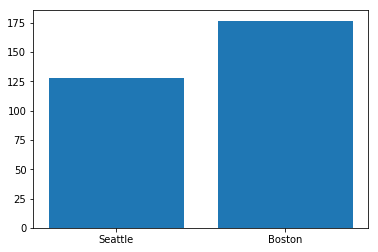

In [144]:
# We concat them into one dataframe

mean_prices = pd.concat([seattle_mean_prices, boston_mean_prices])


# We finally plot the dataframe to visualize the result

plt.bar(["Seattle", "Boston"], mean_prices)

#### Obviously, properties in Boston usually sell higher than they do in Seattle

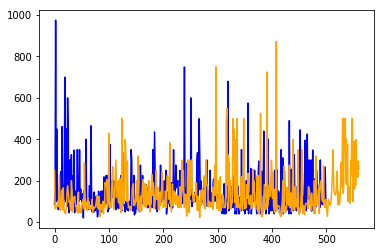

In [145]:
# We additionally visualize part of the prices in both city

seattle_only["price"].head(500).plot(color="Blue")
boston_only["price"].head(500).plot(color="Orange")

# Question 3: Which city has the highest property review ratings?

In [170]:
# In this question we will use the "review_scores_rating" column
# We first make 2 new datafrmaes which consists of only the city name and the review rating of the property

new_boston = df[["city", "review_scores_rating"]]
new_seattle = df2[["city", "review_scores_rating"]]


# We then concat these 2 into a new dataframe

new_df = pd.concat([new_boston, new_seattle], axis=0).reset_index()


# We drop the extra "index" column
new_df.drop("index", inplace=True, axis=1)


# We check if there is any writing mistakes

new_df["city"].unique()


# As expected, there are many writing mistakes such as lower and upper case (Boston, boston), there are also extra white spaces
# We solve this by first changing all into title format
# Then stripping it from the white spaces

# We define a function that does the mentioned

def clean_data_2(col):
    col2 = col.str.title()
    col2 = col2.str.strip()
    return col2
    

new_df["city"] = clean_data_2(new_df["city"])
new_df["city"].unique()


# We can now group the cities and calculate the average review ratings for each city

new_df.groupby("city").mean().sort_values(by="review_scores_rating", ascending=False)

,review_scores_rating
city,
"Jamaica Plain, Ma",100.000000
"Mission Hill, Boston",99.000000
"Ballard, Seattle",98.000000
West Seattle,97.500000
Boston (Jamaica Plain),97.000000
Jamaica Plain (Boston),97.000000
Charlestown,96.692308
Brookline,96.571429
Jamaica Plain,95.736842


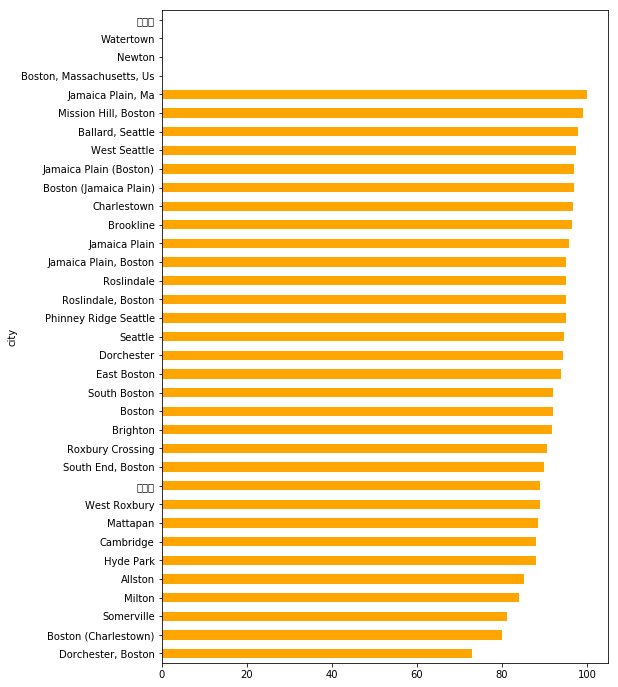

In [181]:
# We can now visualize the results

new_df.groupby("city").mean().sort_values(by="review_scores_rating", ascending=True).plot(kind="barh", figsize=(8, 12), legend=False, color="Orange")


#### As it is clear, Jamaica Plain-Ma has the highest review


##### Data preperation stage was done while answering the questions